In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [28]:
PAD = pd.read_csv("/home/ali/Datasets/PAD-UFES-20/PAD-UFES-20.csv")
FITZ = pd.read_csv("/home/ali/Datasets/Fitz17k/fitzpatrick17k_preprocessed.csv")

In [25]:
grouped_df = FITZ.groupby(['high', 'fitzpatrick_scale']).size().reset_index(name='Count')

pivot_df = grouped_df.pivot(index='high', columns='fitzpatrick_scale', values='Count', ).fillna(0)
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df.loc['Total'] = pivot_df.sum()

pivot_df

fitzpatrick_scale,1,2,3,4,5,6,Total
high,,,,,,,
0,444,671,475,367,159,44,2160
1,453,742,456,301,147,61,2160
2,2050,3395,2377,2113,1227,530,11692
Total,2947,4808,3308,2781,1533,635,16012


In [27]:
grouped_df = PAD.groupby(['low', 'fitzpatrick_scale']).size().reset_index(name='Count')

pivot_df = grouped_df.pivot(index='low', columns='fitzpatrick_scale', values='Count', ).fillna(0)
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df.loc['Total'] = pivot_df.sum()

pivot_df

fitzpatrick_scale,1,2,3,4,5,Total
low,,,,,,
0,25.0,156.0,89.0,10.0,3.0,283.0
1,101.0,502.0,217.0,22.0,3.0,845.0
2,3.0,35.0,10.0,4.0,0.0,52.0
3,4.0,34.0,24.0,12.0,1.0,75.0
4,16.0,126.0,45.0,3.0,2.0,192.0
5,4.0,23.0,7.0,11.0,1.0,46.0
Total,153.0,876.0,392.0,62.0,10.0,1493.0


# GF3300

In [10]:
sample = np.load("/home/ali/Datasets/Harvard-GF3300/Training/data_0001.npz")

In [19]:
for key, val in sample.items():
    if key in ['rnflt', 'oct_bscans']:
        print(key, val.shape)
    else:
        print(key, val)

oct_bscans (200, 200, 200)
rnflt (200, 200)
md 0.66
glaucoma 0
tds [ 2.  3. -2.  2.  2.  0. -2. -1.  2.  0.  7.  1. -5. -1.  0.  2.  2.  3.
  3.  1.  1. -1.  0.  0. -1.  3.  4.  1.  1. -1.  0.  1.  1.  4.  3.  1.
  0. -1. -1.  1.  3.  0.  3.  0.  1.  0.  0.  3. -1.  1. -1.  2.]
race Asian
male 1
hispanic 0
language 0
maritalstatus 1
age 43.31232876712329


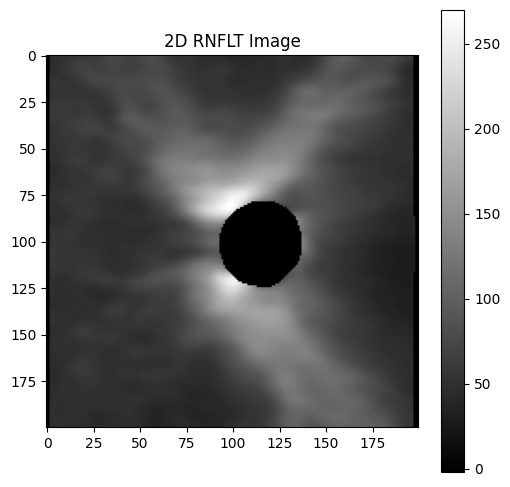

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract data
oct_bscans = sample['oct_bscans']
rnflt = sample['rnflt']

# Plotting the 2D rnflt image
plt.figure(figsize=(6, 6))
plt.imshow(rnflt, cmap='gray')
plt.title('2D RNFLT Image')
plt.colorbar()
plt.show()

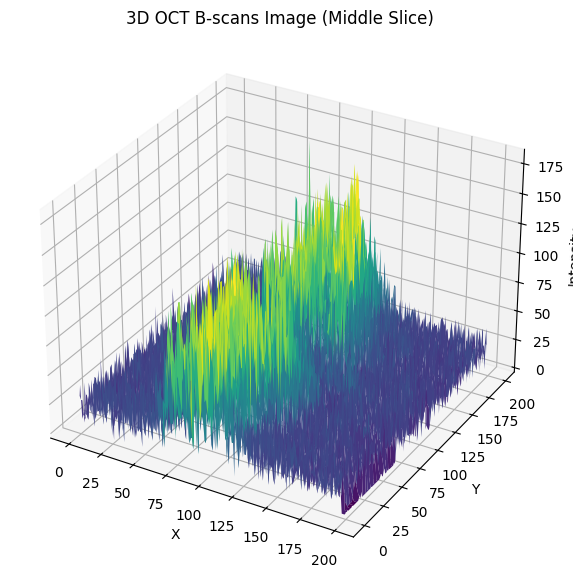

In [12]:
# Plotting the 3D oct_bscans image (slice)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for 3D plotting
x = np.arange(oct_bscans.shape[0])
y = np.arange(oct_bscans.shape[1])
x, y = np.meshgrid(x, y)

# Choose a specific slice to plot, e.g., the middle slice
z = oct_bscans[:, :, oct_bscans.shape[2] // 2]

ax.plot_surface(x, y, z, cmap='viridis')
ax.set_title('3D OCT B-scans Image (Middle Slice)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')

plt.show()